In [195]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import pprint as pprint

# this tells Jupyter to embed matplotlib plots in the notebook
%matplotlib inline

In [43]:
df = pd.read_csv('./summerOly_medal_counts.csv')
df['NOC'] = df['NOC'].str.replace('\xa0', '', regex=True)

In [44]:
df.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [46]:
unique_values = df['NOC'].unique()

print(unique_values) 

['United States' 'Greece' 'Germany' 'France' 'Great Britain' 'Hungary'
 'Austria' 'Australia' 'Denmark' 'Switzerland' 'Mixed team' 'Belgium'
 'Italy' 'Cuba' 'Canada' 'Spain' 'Luxembourg' 'Norway' 'Netherlands'
 'India' 'Bohemia' 'Sweden' 'Australasia' 'Russian Empire' 'Finland'
 'South Africa' 'Estonia' 'Brazil' 'Japan' 'Czechoslovakia' 'New Zealand'
 'Yugoslavia' 'Argentina' 'Uruguay' 'Poland' 'Haiti' 'Portugal' 'Romania'
 'Egypt' 'Ireland' 'Chile' 'Philippines' 'Mexico' 'Latvia' 'Turkey'
 'Jamaica' 'Peru' 'Ceylon' 'Trinidad and Tobago' 'Panama' 'South Korea'
 'Iran' 'Puerto Rico' 'Soviet Union' 'Lebanon' 'Bulgaria' 'Venezuela'
 'United Team of Germany' 'Iceland' 'Pakistan' 'Bahamas' 'Ethiopia'
 'Formosa' 'Ghana' 'Morocco' 'Singapore' 'British West Indies' 'Iraq'
 'Tunisia' 'Kenya' 'Nigeria' 'East Germany' 'West Germany' 'Mongolia'
 'Uganda' 'Cameroon' 'Taiwan' 'North Korea' 'Colombia' 'Niger' 'Bermuda'
 'Thailand' 'Zimbabwe' 'Tanzania' 'Guyana' 'China' 'Ivory Coast' 'Syria'
 'Algeria

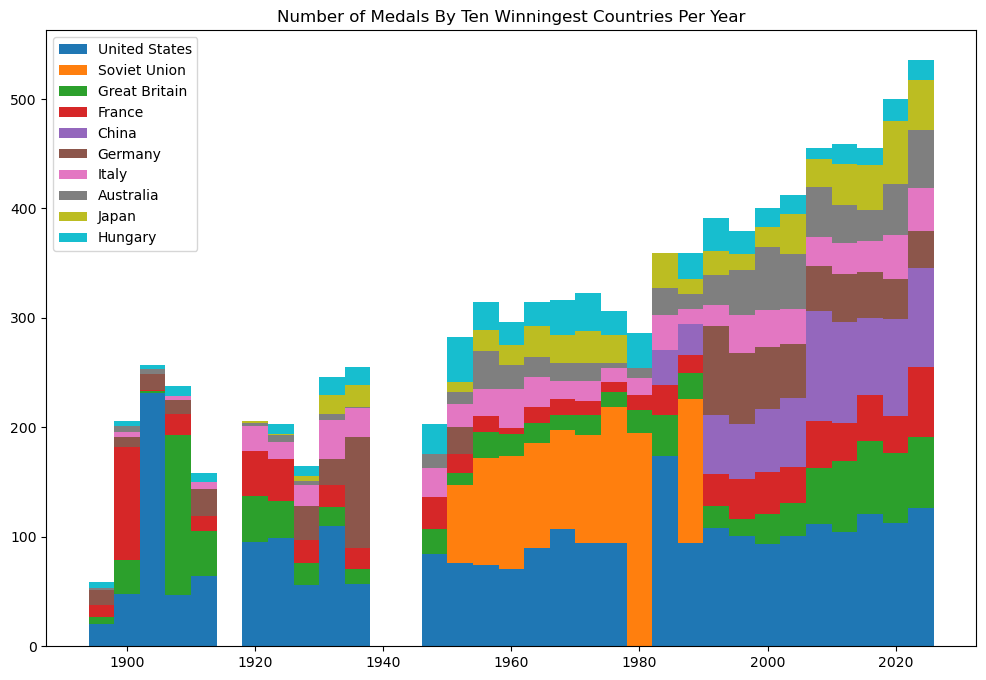

In [92]:
#stacked histogram
countries = df['NOC'].unique()  # Unique countries
years = sorted(df['Year'].unique())  # Unique years

medals = {country: [] for country in countries}
for year in years:
    year_data = df[df['Year'] == year]
    total_medals = year_data['Total'].sum()
    for country in countries:
        country_medals = year_data[year_data['NOC'] == country]['Total'].sum()
        medals[country].append(country_medals if total_medals > 0 else 0)

# Calculate total medals for each country across all years
total_medals_by_country = {country: sum(medals[country]) for country in medals.keys()}

n=10
# Get the top n countries based on total medals
top_n_countries = sorted(total_medals_by_country, key=total_medals_by_country.get, reverse=True)[:n]

# Filter the medals dictionary to include only the top n countries
filtered_medals = {country: medals[country] for country in top_n_countries}
#print(medals)

fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(len(years))

for boolean, medal in filtered_medals.items():
    p = ax.bar(years, medal, 4, label=boolean, bottom=bottom)
    bottom += medal
    
ax.set_title("Number of Medals By Ten Winningest Countries Per Year")
ax.legend(loc="upper left")

plt.show()

In [18]:
import pandas as pd

def analyze_medal_averages(data, country, sport_keywords, coach_start_year):
    # Filter for relevant rows based on country and sport keywords
    filtered_data = data[
        (data['Team'] == country) &
        (data['Sport'].str.contains('|'.join(sport_keywords), case=False, na=False))
    ]
    # Keep rows where medals were won
    filtered_data = filtered_data[filtered_data['Medal'].notna()]
    
    # Sort data by year
    filtered_data = filtered_data.sort_values(by='Year')
    
    # Get the three Olympic Games before and after the coach's start year
    years = filtered_data['Year'].unique()
    before_years = years[years < coach_start_year][-3:]  # Last 3 Olympic Games before
    after_years = years[years >= coach_start_year][:3]  # First 3 Olympic Games after
    
    before_coach = filtered_data[filtered_data['Year'].isin(before_years)]
    after_coach = filtered_data[filtered_data['Year'].isin(after_years)]
    
    # Group by year and sport, then count unique medals per sport
    medals_per_sport_before = before_coach.groupby(['Year', 'Sport'])['Medal'].nunique().sum()
    medals_per_sport_after = after_coach.groupby(['Year', 'Sport'])['Medal'].nunique().sum()
    
    # Total number of Olympic Games in each period
    olympic_sports_before = len(before_years)
    olympic_sports_after = len(after_years)
    
    # Calculate averages
    avg_medals_before = medals_per_sport_before / olympic_sports_before if olympic_sports_before else 0
    avg_medals_after = medals_per_sport_after / olympic_sports_after if olympic_sports_after else 0
    
    # Output results
    print(f"\nAnalyzing {sport_keywords} coached by starting in {coach_start_year}:")
    print(f"- Total medals (3 Games before): {medals_per_sport_before}")
    print(f"- Total medals (3 Games after): {medals_per_sport_after}")
    print(f"- Avg medals per sport (before): {avg_medals_before:.2f}")
    print(f"- Avg medals per sport (after): {avg_medals_after:.2f}")
    print(f"- Change in avg medals per sport: {avg_medals_after - avg_medals_before:.2f}")

# Load data
data = pd.read_csv('summerOly_athletes.csv')

# Coaches to analyze
coaches = [
    {"coach": "Béla Károlyi", "country": "United States", "event": ["Artistic Gymnastics", "Gymnastics"], "start_year": 1981},
    {"coach": "Bob Bowman", "country": "United States", "event": ["Swimming"], "start_year": 2024},
    {"coach": "Paul Manning", "country": "Great Britain", "event": ["Cycling Track", "Track"], "start_year": 2020},
    {"coach": "Mehdi Kordi", "country": "Netherlands", "event": ["Cycling Track", "Track"], "start_year": 2018},
    {"coach": "Michael Palfrey", "country": "Australia", "event": ["Swimming"], "start_year": 2024},
    {"coach": "Jacco Verhaeren", "country": "Australia", "event": ["Swimming"], "start_year": 2013},
    {"coach": "Paul Coffa", "country": "Papua New Guinea", "event": ["Weightlifting"], "start_year": 2000}
]

# Run analysis for each coach
for coach in coaches:
    analyze_medal_averages(
        data=data,
        country=coach["country"],
        sport_keywords=coach["event"],
        coach_start_year=coach["start_year"]
    )



Analyzing ['Artistic Gymnastics', 'Gymnastics'] coached by starting in 1981:
- Total medals (3 Games before): 4
- Total medals (3 Games after): 13
- Avg medals per sport (before): 1.33
- Avg medals per sport (after): 4.33
- Change in avg medals per sport: 3.00

Analyzing ['Swimming'] coached by starting in 2024:
- Total medals (3 Games before): 16
- Total medals (3 Games after): 8
- Avg medals per sport (before): 5.33
- Avg medals per sport (after): 8.00
- Change in avg medals per sport: 2.67

Analyzing ['Cycling Track', 'Track'] coached by starting in 2020:
- Total medals (3 Games before): 0
- Total medals (3 Games after): 8
- Avg medals per sport (before): 0.00
- Avg medals per sport (after): 4.00
- Change in avg medals per sport: 4.00

Analyzing ['Cycling Track', 'Track'] coached by starting in 2018:
- Total medals (3 Games before): 0
- Total medals (3 Games after): 8
- Avg medals per sport (before): 0.00
- Avg medals per sport (after): 4.00
- Change in avg medals per sport: 4.00



In [47]:
pivot_data = df.pivot_table(index="Year", columns="NOC", values="Total", aggfunc="sum", fill_value=0)

In [52]:
print(pivot_data.head())
pivot_data.columns

NOC   Afghanistan  Albania  Algeria  Argentina  Armenia  Australasia  \
Year                                                                   
1896            0        0        0          0        0            0   
1900            0        0        0          0        0            0   
1904            0        0        0          0        0            0   
1908            0        0        0          0        0            5   
1912            0        0        0          0        0            7   

NOC   Australia  Austria  Azerbaijan  Bahamas  ...  United Team of Germany  \
Year                                           ...                           
1896          2        5           0        0  ...                       0   
1900          5        6           0        0  ...                       0   
1904          4        3           0        0  ...                       0   
1908          0        1           0        0  ...                       0   
1912          0        4   

Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australasia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'United Team of Germany', 'Uruguay', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'Virgin Islands', 'West Germany', 'Yugoslavia', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='NOC', length=164)

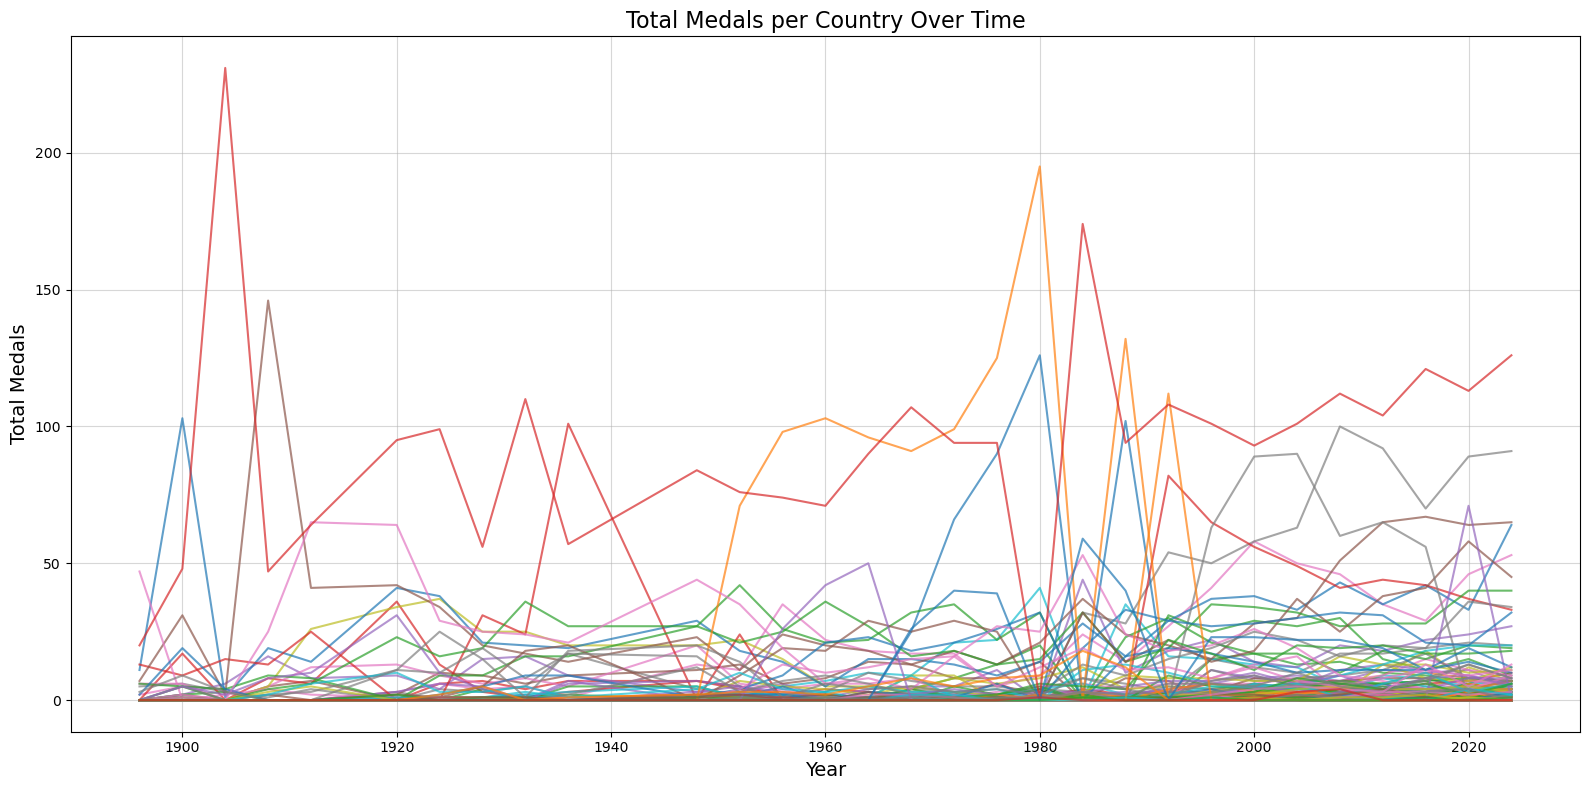

In [53]:
# each country's total medals over time on the same graph
pivot_data.plot(figsize=(16, 8), legend=False, alpha=0.7)
plt.title("Total Medals per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)
plt.grid(alpha=0.5)

# legend outside the plot
#plt.legend(pivot_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

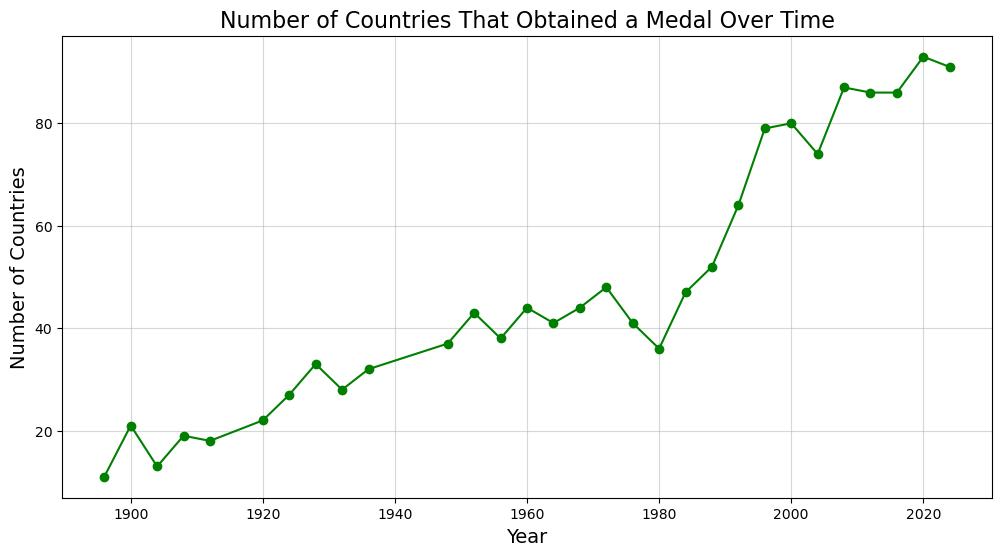

In [55]:
# Calculate the number of unique countries (NOC) with at least one medal per year
countries_with_medals = df[df["Total"] > 0].groupby("Year")["NOC"].nunique()

# Plot the data
plt.figure(figsize=(12, 6))
countries_with_medals.plot(marker="o", color="green")
plt.title("Number of Countries That Obtained a Medal Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [58]:
athletes = pd.read_csv('./summerOly_athletes.csv')
athletes.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


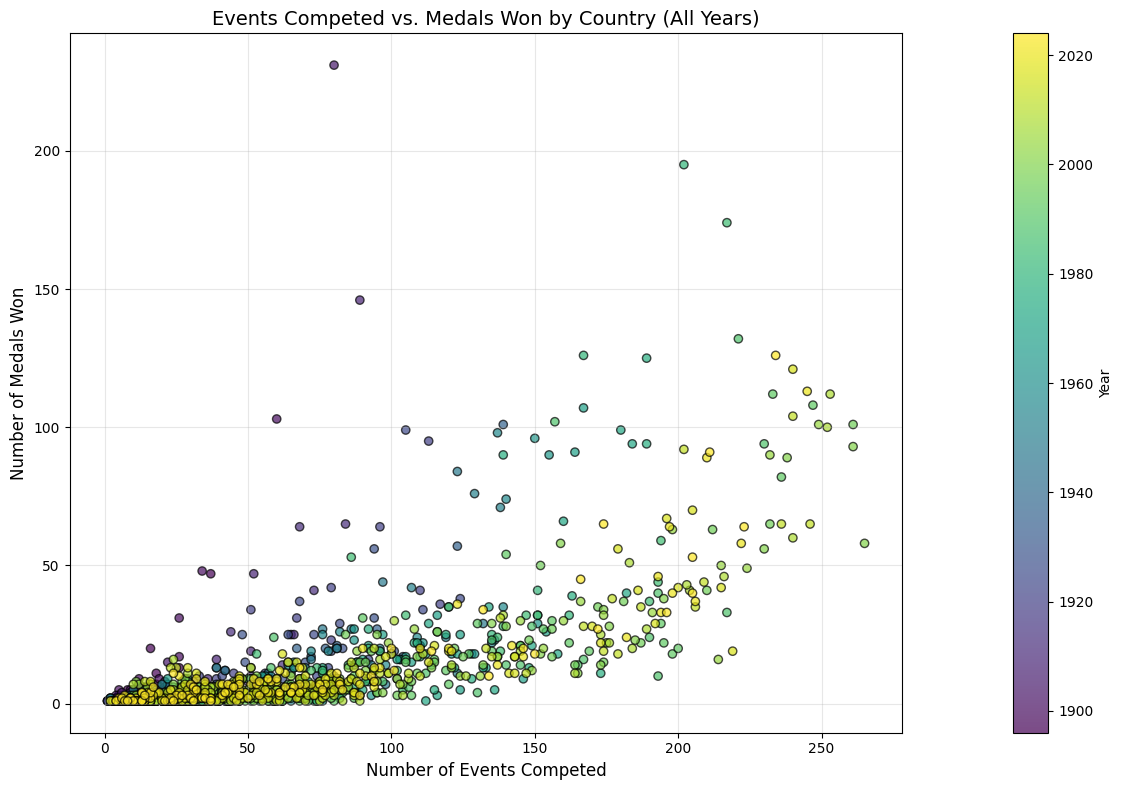

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
medal_counts_file = "summerOly_medal_counts.csv"
athletes_file = "summerOly_athletes.csv"

# Read the medal counts file
medal_data = pd.read_csv(medal_counts_file)

# Read the athletes file
athletes_data = pd.read_csv(athletes_file)

# Group the athletes data by Year and Team to calculate the number of unique events
athletes_grouped = (
    athletes_data.groupby(["Year", "Team"])["Event"].nunique().reset_index()
)
athletes_grouped.rename(columns={"Event": "Events_Competed"}, inplace=True)

# Merge the medal data with the grouped athletes data on Year and Team
merged_data = pd.merge(
    medal_data,
    athletes_grouped,
    on=["Year", "Team"],
    how="inner",
)

# Plot the data
plt.figure(figsize=(12, 8))

# Scatter plot: Events competed (x-axis) vs. Medals won (y-axis)
plt.scatter(
    merged_data["Events_Competed"],
    merged_data["Total"],
    alpha=0.7,
    c=merged_data["Year"],  # Color by year
    cmap="viridis",
    edgecolor="k",
)

# Add labels and title
plt.colorbar(label="Year", pad=0.1)
plt.title("Events Competed vs. Medals Won by Country (All Years)", fontsize=14)
plt.xlabel("Number of Events Competed", fontsize=12)
plt.ylabel("Number of Medals Won", fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


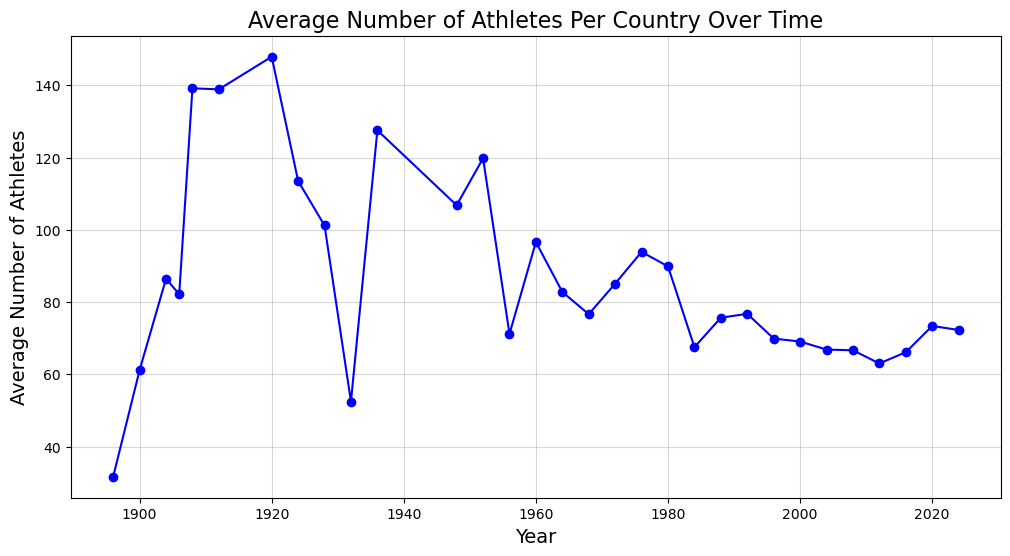

In [64]:
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
avg_athletes_per_country = athlete_counts.groupby('Year')['Athlete_Count'].mean()

plt.figure(figsize=(12, 6))
avg_athletes_per_country.plot(marker='o', color='blue')
plt.title("Average Number of Athletes Per Country Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Number of Athletes", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

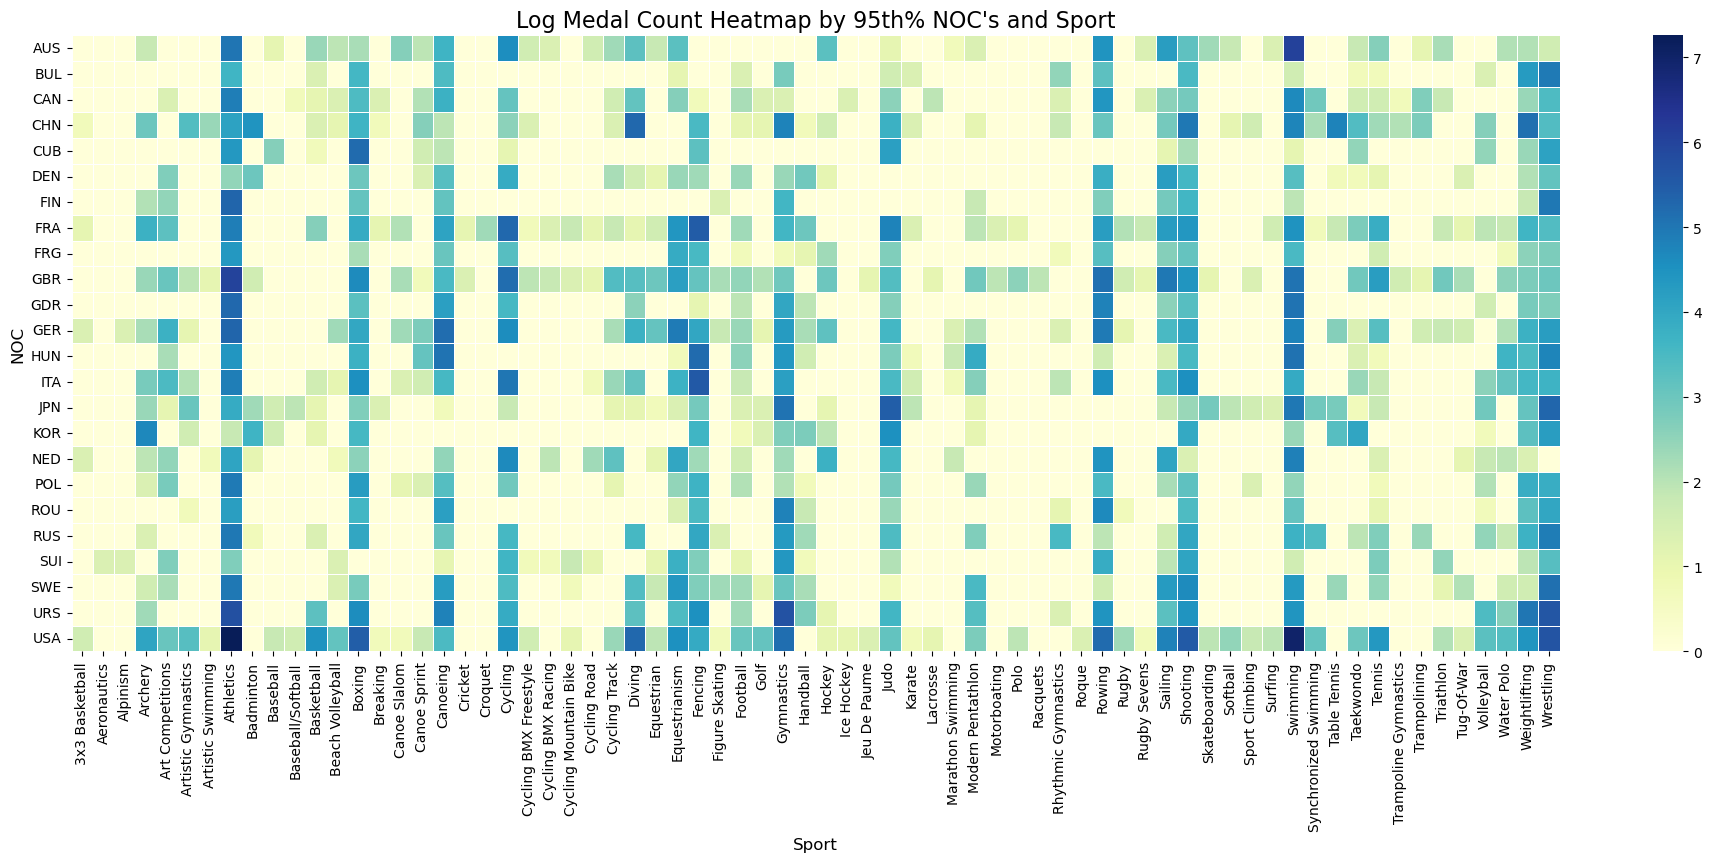

In [171]:
buffer = athletes_data.copy()
buffer['NOC'] = buffer['NOC'].str.replace('\xa0', '', regex=True)
buffer["Medal"] = buffer["Medal"].str.replace('\xa0', '', regex=True)
buffer['Sport'] = buffer['Sport'].str.split(',', n=1).str[0]

# weight gold, silver, and bronze medals accordingly
medal_mapping = {
    "No medal": 0,
    "Bronze": 1,
    "Silver": 2,
    "Gold": 3
}

buffer["Medal"] = buffer["Medal"].replace(medal_mapping)
collapsed_data = buffer.groupby(['NOC', 'Year', 'Sport', 'Event'], as_index=False)["Medal"].max()
#print(collapsed_data["Medal"].describe())

total_medals_by_noc = collapsed_data.groupby('NOC')['Medal'].sum()
#print(total_medals_by_noc.describe())
q3_cutoff = total_medals_by_noc.quantile(0.9)
top_countries = total_medals_by_noc[total_medals_by_noc >= q3_cutoff].index
medals_table = collapsed_data.groupby(['NOC', 'Sport'])['Medal'].sum().reset_index()
filtered_medals_table = medals_table[medals_table['NOC'].isin(top_countries)]

#print(buffer["Medal"].unique())

pivot_table = filtered_medals_table.pivot(index='NOC', columns='Sport', values='Medal').fillna(0)
#pivot_table
log_pivot_table = np.log1p(pivot_table)
plt.figure(figsize=(24, 8))  # Adjust the size if needed
sns.heatmap(log_pivot_table, cmap='YlGnBu', fmt='g', linewidths=0.5)

# Add labels and title
plt.title('Log Medal Count Heatmap by 95th% NOC\'s and Sport', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('NOC', fontsize=12)

# Show the heatmap
plt.show()

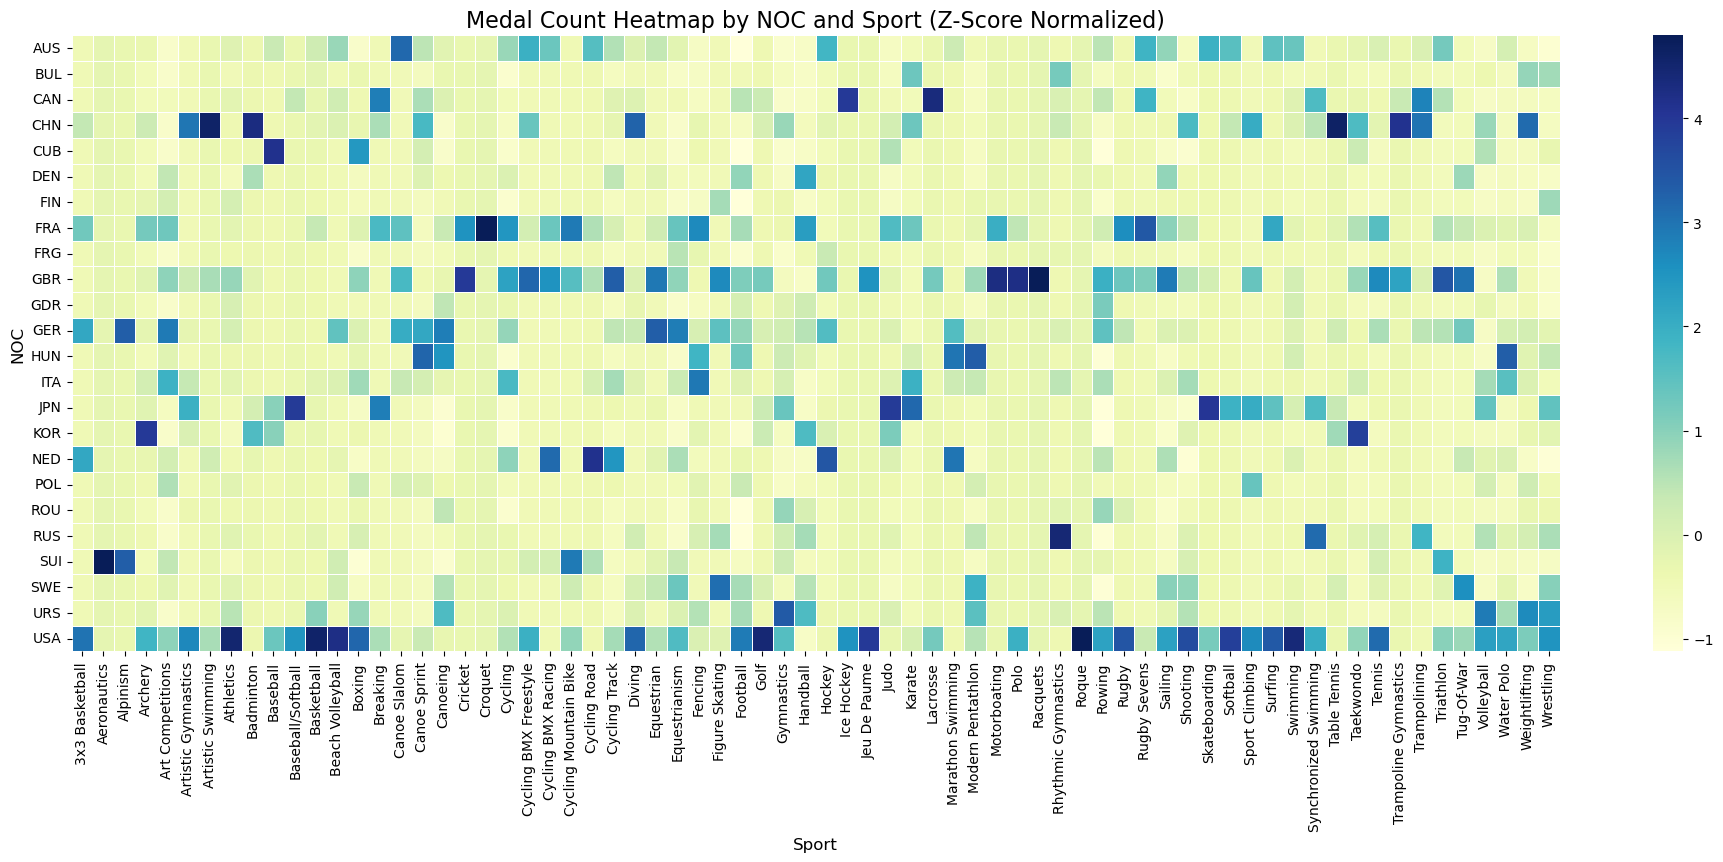

In [174]:
from scipy.stats import zscore
# Normalize using z-scores
z_pivot_table = pivot_table.apply(zscore)

# Create the heatmap with z-scored data
plt.figure(figsize=(24, 8))
sns.heatmap(z_pivot_table, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Medal Count Heatmap by NOC and Sport (Z-Score Normalized)', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('NOC', fontsize=12)

# Show the heatmap
plt.show()

In [180]:
pivot_table

Sport,3x3 Basketball,Aeronautics,Alpinism,Archery,Art Competitions,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,Baseball,...,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
NOC,,,,,,,,,,,,,,,,,,,,,
AUS,0.0,0.0,0.0,5.0,0.0,0.0,0.0,151.0,0.0,2.0,...,5.0,13.0,0.0,2.0,8.0,0.0,0.0,7.0,7.0,4.0
BUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,73.0,141.0
CAN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,129.0,0.0,0.0,...,4.0,4.0,1.0,14.0,5.0,0.0,0.0,0.0,10.0,30.0
CHN,1.0,0.0,0.0,19.0,0.0,28.0,10.0,61.0,87.0,0.0,...,29.0,9.0,7.0,15.0,0.0,0.0,13.0,0.0,167.0,29.0
CUB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,13.0,...,11.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,10.0,61.0
DEN,0.0,0.0,0.0,0.0,14.0,0.0,0.0,11.0,19.0,0.0,...,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,22.0
FIN,0.0,0.0,0.0,7.0,11.0,0.0,0.0,203.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,146.0
FRA,2.0,0.0,0.0,42.0,24.0,0.0,0.0,127.0,0.0,0.0,...,15.0,45.0,0.0,0.0,5.0,2.0,6.0,5.0,37.0,29.0
FRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,15.0


C:\Users\conno\anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


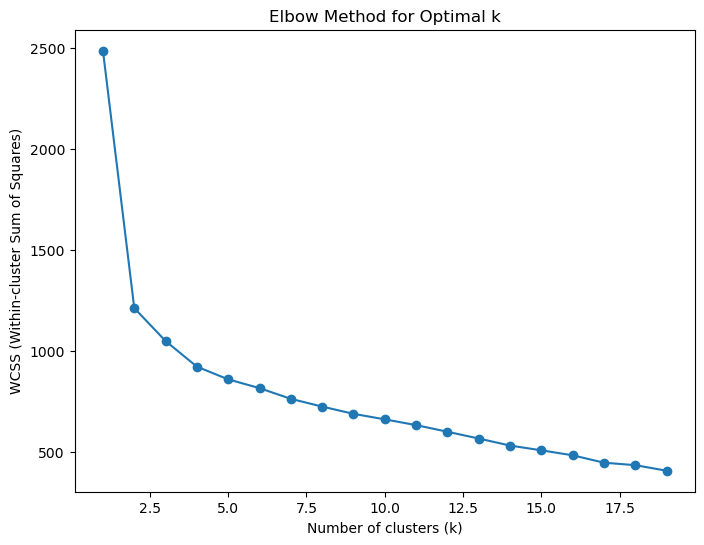

                    Sport  Cluster
0          3x3 Basketball        2
1             Aeronautics        2
2                Alpinism        2
3                 Archery        0
4        Art Competitions        0
5     Artistic Gymnastics        0
6       Artistic Swimming        2
7               Athletics        1
8               Badminton        2
9                Baseball        2
10      Baseball/Softball        2
11             Basketball        0
12          Basque Pelota        2
13       Beach Volleyball        2
14                 Boxing        1
15               Breaking        2
16           Canoe Slalom        2
17           Canoe Sprint        0
18               Canoeing        3
19                Cricket        2
20                Croquet        2
21                Cycling        3
22  Cycling BMX Freestyle        2
23     Cycling BMX Racing        2
24  Cycling Mountain Bike        2
25           Cycling Road        2
26          Cycling Track        0
27                 D

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

q3_cutoff = total_medals_by_noc.quantile(0.85)
top_countries = total_medals_by_noc[total_medals_by_noc >= q3_cutoff].index
medals_table = collapsed_data.groupby(['NOC', 'Sport'])['Medal'].sum().reset_index()
filtered_medals_table = medals_table[medals_table['NOC'].isin(top_countries)]

#print(buffer["Medal"].unique())

pivot_table = filtered_medals_table.pivot(index='NOC', columns='Sport', values='Medal').fillna(0)
#pivot_table
log_pivot_table = np.log1p(pivot_table)

# Assuming pivot_table is the matrix with NOCs as rows and sports as columns
# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_pivot_table.T)  # Transpose to make sports as rows

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Change n_clusters to the number of clusters you want
sports_clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the sports names
sports_clustered = pd.DataFrame({
    'Sport': log_pivot_table.columns,
    'Cluster': sports_clusters
})

# Assuming 'scaled_data' is your normalized data
wcss = []

# Try a range of cluster numbers (for example, from 1 to 10 clusters)
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)  # Fit the model
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances of samples to their closest cluster center

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

# View the sports and their assigned clusters
print(sports_clustered.to_string())
inverted_clusters = sports_clustered.groupby('Cluster')['Sport'].apply(list).to_dict()

pprint.pprint(inverted_clusters)

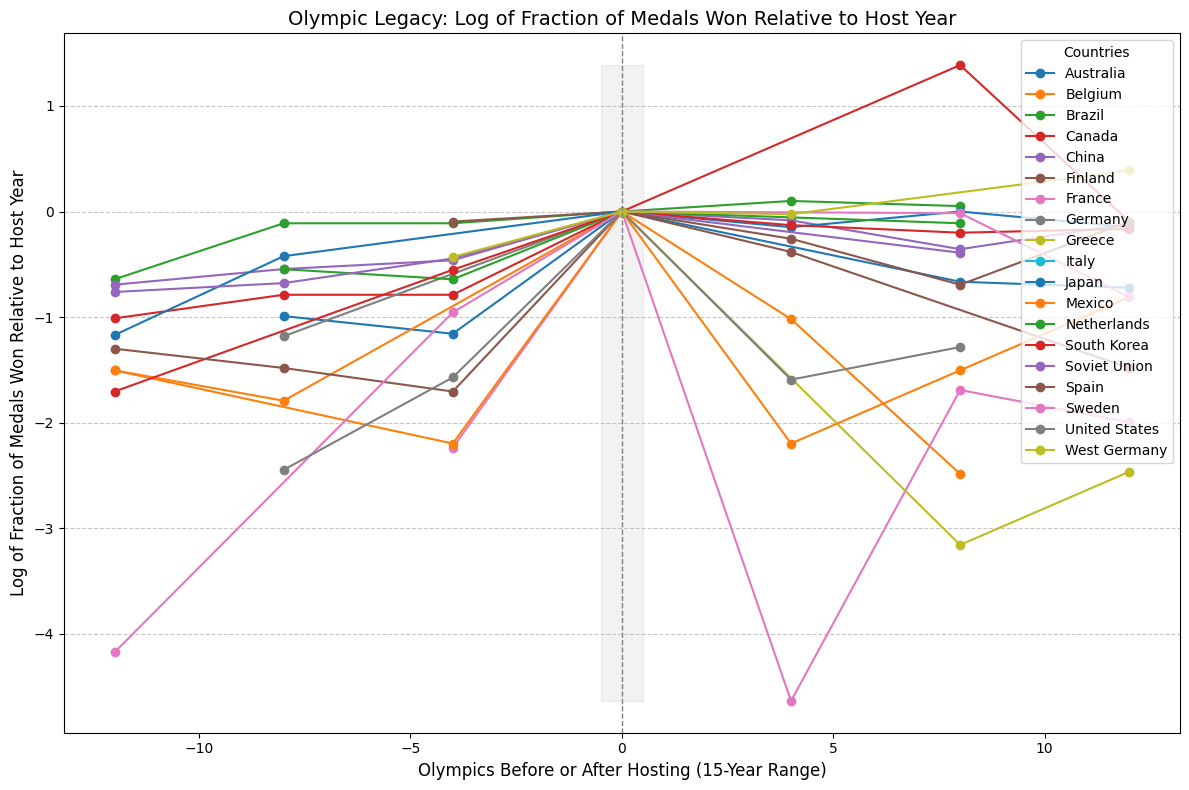

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
medals_data = pd.read_csv('summerOly_medal_counts.csv')  # Medal counts per NOC and Year
hosts_data = pd.read_csv('summerOly_hosts.csv')  # Host countries per year

# Clean and prepare the hosts data
hosts_data['Host_Country'] = hosts_data['Host'].str.split(',').str[-1].str.strip()  # Extract the country name
host_years = hosts_data['Year'].unique()

# Merge medal data with host data
medals_data['Is_Host'] = medals_data.apply(
    lambda row: 1 if row['Year'] in host_years and row['NOC'] == hosts_data.loc[hosts_data['Year'] == row['Year'], 'Host_Country'].values[0] else 0,
    axis=1
)

# Calculate relative performance compared to host year
medals_data['Olympics_From_Host'] = medals_data.apply(
    lambda row: row['Year'] - hosts_data.loc[hosts_data['Host_Country'] == row['NOC'], 'Year'].values[0]
    if row['NOC'] in hosts_data['Host_Country'].values else None,
    axis=1
)

# Aggregate total medals
medals_data['Total_Medals'] = medals_data['Gold'] + medals_data['Silver'] + medals_data['Bronze']

# Filter for host countries and create a copy to avoid SettingWithCopyWarning
host_country_data = medals_data[medals_data['Olympics_From_Host'].notnull()].copy()

# Calculate medals in the host year for each country
host_year_medals = host_country_data[host_country_data['Olympics_From_Host'] == 0].set_index('NOC')['Total_Medals']

# Calculate the fraction of medals relative to the host year
host_country_data['Fraction_of_Host'] = host_country_data.apply(
    lambda row: (row['Total_Medals'] / host_year_medals[row['NOC']])
    if row['NOC'] in host_year_medals else None,
    axis=1
)

# Apply log transformation: log(fraction of host medals)
host_country_data['Log_Fraction_of_Host'] = host_country_data['Fraction_of_Host'].apply(
    lambda x: np.log(x) if pd.notnull(x) and x > 0 else None
)

# Filter data for only 15 years before and after hosting
filtered_data = host_country_data[
    (host_country_data['Olympics_From_Host'] >= -15) & (host_country_data['Olympics_From_Host'] <= 15)
]

# Pivot the data for plotting (log-transformed)
pivot_log_data = filtered_data.pivot(index='Olympics_From_Host', columns='NOC', values='Log_Fraction_of_Host')

# Plot the graph with the log-transformed y-axis
plt.figure(figsize=(12, 8))
for country in pivot_log_data.columns:
    y = pivot_log_data[country].dropna()
    x = y.index
    plt.plot(x, y, label=country, marker='o')  # Plot raw data points with markers

# Highlight the hosting year (x=0)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.fill_betweenx(
    y=[pivot_log_data.min().min(), pivot_log_data.max().max()],
    x1=-0.5, x2=0.5, color='gray', alpha=0.1
)

# Add labels and legend
plt.title('Olympic Legacy: Log of Fraction of Medals Won Relative to Host Year', fontsize=14)
plt.xlabel('Olympics Before or After Hosting (15-Year Range)', fontsize=12)
plt.ylabel('Log of Fraction of Medals Won Relative to Host Year', fontsize=12)
plt.legend(title='Countries', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
